In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

annotation_path = './data/ILT_data/ILT_data_annotations.csv'
df = pd.read_csv(annotation_path, index_col = 0)

# Caption length is computed based on a crude tokenization of the caption
df['caption_length'] = df['caption'].map(lambda x: len(re.split(r'[\s,.]', x)))
print(df[df['caption_length'] < 3].shape)
display(df)
print('Columns:', df.columns.tolist())
print('Total annotations:', df.shape)
print('Number of annotated images:', df['img'].unique().shape)

(26, 10)


,img,folder,naam,label,caption,start,end,flag,n_seconds,caption_length
0,../fotos_klein2/fotos_klein2/eigenwerken/DJI_0...,eigenwerken,Lucy,Eigenwerken/water engineering,a construction site around a river and some ye...,2023-12-18T15:13:36.577,2023-12-18T15:15:12.020,False,95,22
1,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,schepen,Lucy,Sea faring/inland shipping,some containers containing gass or stuff on a ...,2023-12-18T15:15:12.059,2023-12-18T15:16:01.399,True,49,14
2,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,schepen,Lucy,Sea faring/inland shipping,a ship in the harbor with open latches being f...,2023-12-18T15:16:01.432,2023-12-18T15:16:59.256,False,57,17
3,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,afvalhopen,Lucy,Waste storage/waste processor,aerial view of a couple of big bags next to a ...,2023-12-18T15:16:59.282,2023-12-18T15:17:28.678,False,29,12
4,../fotos_klein2/fotos_klein2/luchtvaart/DJI_03...,luchtvaart,Lucy,Airstrip/aviation,an arial view of an airstrip with yellow lines...,2023-12-18T15:17:28.709,2023-12-18T15:17:53.004,False,24,12
...,...,...,...,...,...,...,...,...,...,...
289,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,schepen,Lucy,Sea faring/inland shipping,a stack of containers on a ship,2024-01-11T14:25:16.703,2024-01-11T14:25:39.082,False,22,7
290,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,afvalhopen,Lucy,Waste storage/waste processor,the top of an open container on a truck that i...,2024-01-11T14:25:39.121,2024-01-11T14:26:05.502,False,26,22
291,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,schepen,Lucy,Sea faring/inland shipping,the deck of a larger ship and a part of a smal...,2024-01-11T14:26:05.540,2024-01-11T14:26:31.652,False,26,16
292,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,afvalhopen,Lucy,Waste storage/waste processor,a couple of empty open and closed containers i...,2024-01-11T14:27:37.332,2024-01-11T14:28:26.743,False,49,23


Columns: ['img', 'folder', 'naam', 'label', 'caption', 'start', 'end', 'flag', 'n_seconds', 'caption_length']
Total annotations: (294, 10)
Number of annotated images: (124,)


In [2]:
def get_stats(lst, rounded = -1):
    stats_dict = {
        'shape': np.array(lst).shape,
        'mean': np.mean(lst), 
        'median': np.median(lst), 
        'std': np.std(lst), 
        'min': np.min(lst), 
        'max': np.max(lst)
    }
    if rounded > 0:
        for key in stats_dict:
            if key != 'shape':
                stats_dict[key] = round(stats_dict[key], rounded)
    return stats_dict

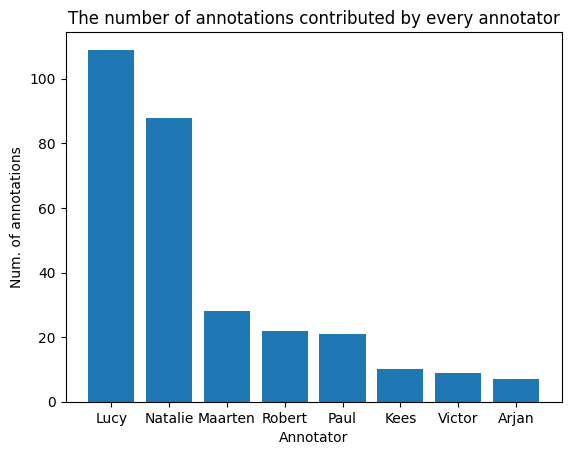

In [3]:
annotator_counts = df['naam'].value_counts()
names, freq = annotator_counts.index.tolist(), annotator_counts.values.tolist()

plt.bar(names, freq)
plt.xlabel('Annotator')
plt.ylabel('Num. of annotations')
plt.title('The number of annotations contributed by every annotator')
plt.savefig('./images/num_annotations_per_annotator.pdf', transparent = True, bbox_inches='tight')
plt.show()

In [4]:
get_stats(freq)

{'shape': (8,),
 'mean': 36.75,
 'median': 21.5,
 'std': 36.67338953519295,
 'min': 7,
 'max': 109}

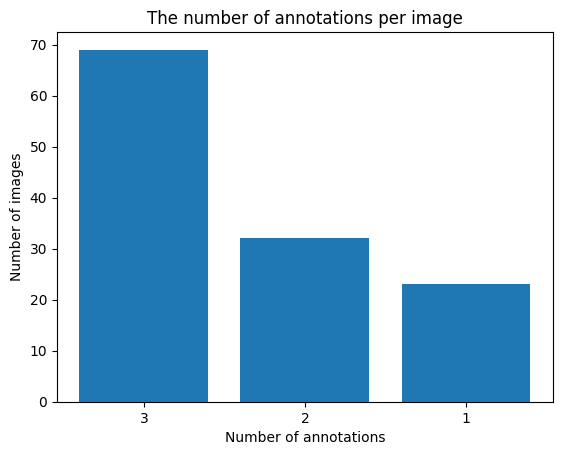

3    69
2    32
1    23
Name: caption, dtype: int64
3 69
2 32
1 23
{'shape': (124,), 'mean': 2.370967741935484, 'median': 3.0, 'std': 0.7773791985345737, 'min': 1, 'max': 3}


In [5]:
# Count the number of times images are labeled
img_counts = df.groupby('img').agg('count')['caption'].value_counts()
num_annotations, freq = img_counts.index.tolist(), img_counts.values.tolist()
num_annotations = [str(n) for n in num_annotations]
plt.bar(num_annotations, freq)
plt.xlabel('Number of annotations')
plt.ylabel('Number of images')
plt.title('The number of annotations per image')
plt.savefig('./images/num_annotations_per_image.pdf', transparent = True, bbox_inches='tight')
plt.show()
print(img_counts)
caption_freqs = []
for count in img_counts.keys():
    print(count, img_counts[count])
    # We have a list of num. of captions, and how many images have that many captions
    # Here, we repeat the num. of captions times how many images have that many captions
    caption_freqs.extend([count] * img_counts[count])
print(get_stats(caption_freqs))

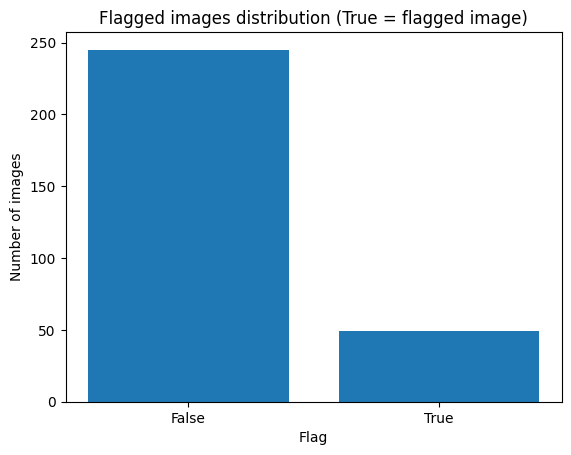

False    245
True      49
Name: flag, dtype: int64


In [6]:
# Count how many images were flagged as being hard to label
flag_counts = df['flag'].value_counts()
flag, freq = flag_counts.index.tolist(), flag_counts.values.tolist()
flag = [str(f) for f in flag]
plt.bar(flag, freq)
plt.xlabel('Flag')
plt.ylabel('Number of images')
plt.title('Flagged images distribution (True = flagged image)')
plt.savefig('./images/flag_distribution.pdf', transparent = True, bbox_inches='tight')
plt.show()
print(flag_counts)

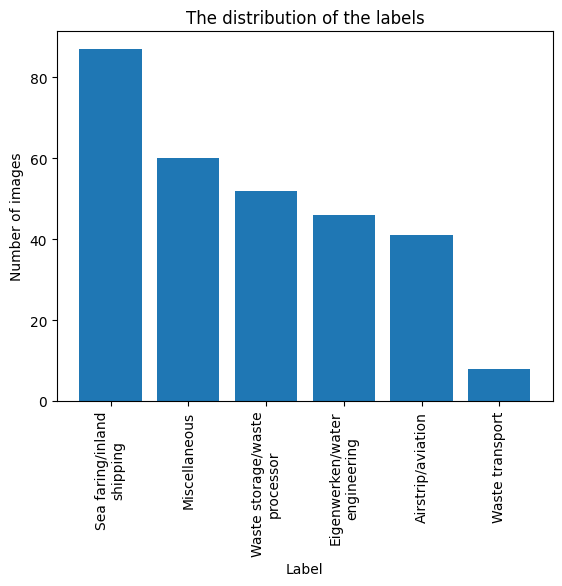

Sea faring/inland shipping       87
Miscellaneous                    60
Waste storage/waste processor    52
Eigenwerken/water engineering    46
Airstrip/aviation                41
Waste transport                   8
Name: label, dtype: int64


In [7]:
import textwrap
# Count the frequency of labels
label_counts = df['label'].value_counts()
label, freq = label_counts.index.tolist(), label_counts.values.tolist()
label = [textwrap.fill(l, 20) for l in label]
plt.bar(label, freq)
plt.xlabel('Label')
plt.xticks(rotation=90)
plt.ylabel('Number of images')
plt.title('The distribution of the labels')
plt.savefig('./images/label_distribution.pdf', transparent = True, bbox_inches='tight')
plt.show()

print(label_counts)

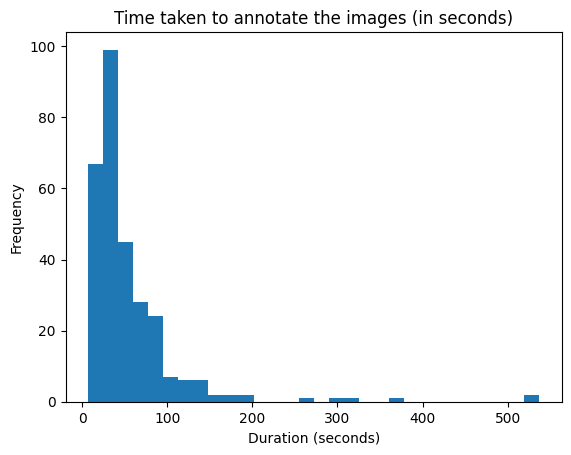

<Figure size 640x480 with 0 Axes>

{'shape': (294,), 'mean': 55.56, 'median': 37.5, 'std': 60.46, 'min': 7, 'max': 537}


In [8]:
# Plot the annotation durations
filter_outliers = False
if filter_outliers:
    annotation_duration = df[df['n_seconds']< 250]['n_seconds']
else:
    annotation_duration = df['n_seconds']

plt.hist(annotation_duration, bins = 30)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Time taken to annotate the images (in seconds)')
plt.show()
plt.savefig('./images/annotation_duration.pdf', transparent = True, bbox_inches='tight')
plt.show()
print(get_stats(annotation_duration, rounded = 2))

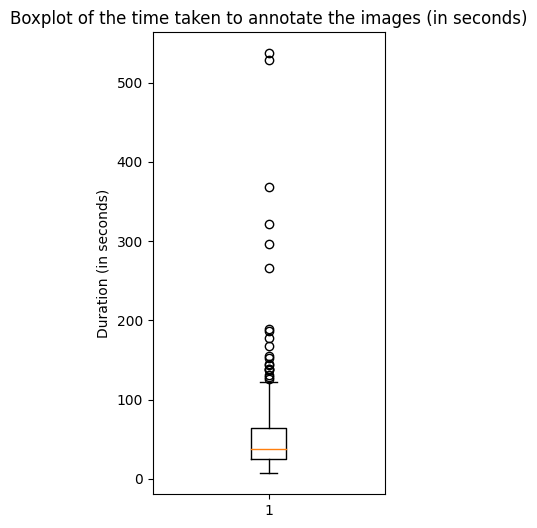

In [9]:
fig, _ = plt.subplots(figsize=(3, 6))
boxplot = plt.boxplot(annotation_duration)
plt.ylabel('Duration (in seconds)')
plt.title('Boxplot of the time taken to annotate the images (in seconds)')
plt.savefig('./images/annotation_duration_boxplot.pdf', transparent = True, bbox_inches='tight')
plt.show()

In [10]:
outliers = [flier.get_ydata() for flier in boxplot["fliers"]]
boxes = [box.get_ydata() for box in boxplot["boxes"]]
medians = [median.get_ydata() for median in boxplot["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot["whiskers"]]
outliers[0].shape, medians[0]

((20,), array([37.5, 37.5]))

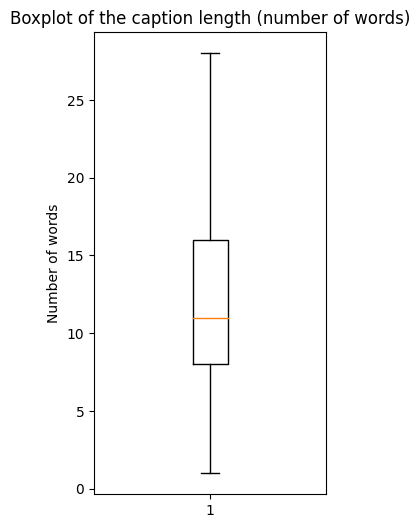

In [11]:
fig, _ = plt.subplots(figsize=(3, 6))
boxplot = plt.boxplot(df['caption_length'])
plt.ylabel('Number of words')
plt.title('Boxplot of the caption length (number of words)')
plt.savefig('./images/caption_length.pdf', transparent = True, bbox_inches='tight')
plt.show()

In [12]:
outliers = [flier.get_ydata() for flier in boxplot["fliers"]]
boxes = [box.get_ydata() for box in boxplot["boxes"]]
medians = [median.get_ydata() for median in boxplot["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot["whiskers"]]
outliers[0].shape, medians[0]

((0,), array([11., 11.]))

In [13]:
# df = df.replace('Waste transport', 'Waste storage/waste processor')

In [14]:
# Get the value counts for the labels, per image
label_counts = df.groupby('img')['label'].agg([('label_counts', lambda x: list(x.value_counts()))]).reset_index()
# Obtain which images have been labeled with more than one kind of label
label_counts['more_than_one_label'] = label_counts['label_counts'].map(lambda x: len(x) > 1)
display(label_counts)
label_counts['more_than_one_label'].value_counts()

,img,label_counts,more_than_one_label
0,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,"[2, 1]",True
1,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
2,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[1],False
3,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,"[2, 1]",True
4,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
...,...,...,...
119,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,[1],False
120,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,[1],False
121,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,"[2, 1]",True
122,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,[3],False


False    91
True     33
Name: more_than_one_label, dtype: int64

In [15]:
df = df.replace('Waste transport', 'Waste storage/waste processor')

In [16]:
# Get the value counts for the labels, per image
label_counts = df.groupby('img')['label'].agg([('label_counts', lambda x: list(x.value_counts()))]).reset_index()
# Obtain which images have been labeled with more than one kind of label
label_counts['more_than_one_label'] = label_counts['label_counts'].map(lambda x: len(x) > 1)
display(label_counts)
label_counts['more_than_one_label'].value_counts()

,img,label_counts,more_than_one_label
0,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
1,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
2,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[1],False
3,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
4,../fotos_klein2/fotos_klein2/afvalhopen/DJI_20...,[3],False
...,...,...,...
119,../fotos_klein2/fotos_klein2/schepen/DJI_20230...,[1],False
120,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,[1],False
121,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,"[2, 1]",True
122,../fotos_klein2/fotos_klein2/schepen/DJI_20231...,[3],False


False    94
True     30
Name: more_than_one_label, dtype: int64

In [17]:
# Make a dictionary with keys=voters, values=label votes
# I.e. keep track of which label each voter/annotator assigned to each image
raters = df['naam'].unique()

# Dictionary to convert a label to an integer value
labels_int = {label:i for i, label in enumerate(df['label'].unique().tolist())}

# The dictionary keeping track of the raters and their votes
rater_votes = {r:[] for r in raters}

for img in df['img'].unique():
    for rater in raters:
        votes = df[(df['img'] == img) & (df['naam'] == rater)]['label'].tolist()
        # If the voter/annotator didn't assign a label, use a placeholder vote (-1)
        vote = -1 if len(votes) == 0 else labels_int[votes[0]]
        rater_votes[rater].append(vote)

In [18]:
# Computing inter-rater reliability based on the labels
from statsmodels.stats import inter_rater as irr
from krippendorff_alpha import krippendorff_alpha

# Make an array of the raters and their votes
votes_arr = np.array(list(rater_votes.values()))

# Compute the krippendorff alpha (= inter-rater reliability), using -1 as placeholder vote
alpha = krippendorff_alpha(votes_arr, missing_items = [-1]) 
print(f'Krippendorff alpha = {round(alpha, 3)}')

Krippendorff alpha = 0.686


In [19]:
import nltk
nltk.download('wordnet')
from nltk.translate.bleu_score import sentence_bleu as bleu
from nltk.translate.meteor_score import meteor_score
captions_per_img = df.groupby('img')['caption'].agg(lambda x: list(x))

bleu_1, bleu_2, meteor = [], [], []
ngram_1 = (1,0,0,0)
ngram_2 = (0,1,0,0)

for i, captions in enumerate(captions_per_img):
    if len(captions) == 1: # Skip if we can't calculate inter-rater reliability
        continue
    bleu_1_img, bleu_2_img, meteor_img = [], [], []
    for caption in captions:
        rem_captions = list(set(captions)-set([caption]))
        references = [nltk.word_tokenize(c) for c in rem_captions]
        candidate = nltk.word_tokenize(caption)
        score_n1 = bleu(references, candidate, weights = ngram_1)
        score_n2 = bleu(references, candidate, weights = ngram_2)
        meteor_caption = meteor_score(references, candidate)
        bleu_1_img.append(score_n1)
        bleu_2_img.append(score_n2)
        meteor_img.append(meteor_caption)
#         bleu_1.append(score_n1)
#         bleu_2.append(score_n2)
    bleu_1.append(sum(bleu_1_img)/len(captions))
    bleu_2.append(sum(bleu_2_img)/len(captions))
    meteor.append(sum(meteor_img)/len(captions))


[nltk_data] Downloading package wordnet to C:\Users\natalie-
[nltk_data]     hollain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\natalie-hollain\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\natalie-hollain\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\natalie-hollain\AppData\Local\Programs\Python\Python311\Lib\site-pac

In [20]:
sum(bleu_1)/len(bleu_1), sum(bleu_2)/len(bleu_2), sum(meteor)/len(meteor)

(0.2753082236611463, 0.08792834366202604, 0.2564339139942195)

In [21]:
import json 
# Compare to RSICD, UCM and Sydney
with open('./data/RSICD/dataset_rsicd.json', 'r') as f:
    rsicd_data = json.load(f)
with open('./data/UCM_captions/dataset.json', 'r') as f:
    ucm_data = json.load(f)
with open('./data/sydney_captions/dataset.json', 'r') as f:
    sydney_data = json.load(f)

In [22]:
rsicd_sentences = [d['sentences'] for d in rsicd_data['images']]
ucm_sentences = [d['sentences'] for d in ucm_data['images']]
sydney_sentences = [d['sentences'] for d in sydney_data['images']]

def compute_bleu_and_meteor(sentences):
    bleu_1, bleu_2, meteor = [], [], []
    ngram_1 = (1,0,0,0)
    ngram_2 = (0,1,0,0)

    for captions in sentences:
        captions = [c['raw'] for c in captions]  
        
        if len(set(captions)) == 1: # Skip if we can't calculate inter-rater reliability
            continue
        bleu_1_img, bleu_2_img, meteor_img = [], [], []
        for caption in captions:
            rem_captions = list(set(captions)-set([caption]))
            references = [nltk.word_tokenize(c) for c in rem_captions]
            candidate = nltk.word_tokenize(caption)
            score_n1 = bleu(references, candidate, weights = ngram_1)
            score_n2 = bleu(references, candidate, weights = ngram_2)
            meteor_caption = meteor_score(references, candidate)
            bleu_1_img.append(score_n1)
            bleu_2_img.append(score_n2)
            meteor_img.append(meteor_caption)
#             bleu_1.append(score_n1)
#             bleu_2.append(score_n2)
        bleu_1.append(sum(bleu_1_img)/len(captions))
        bleu_2.append(sum(bleu_2_img)/len(captions))
        meteor.append(sum(meteor_img)/len(captions))
    bleu_1 = sum(bleu_1)/len(bleu_1)
    bleu_2 = sum(bleu_2)/len(bleu_2)
    meteor = sum(meteor)/len(meteor)
    return bleu_1, bleu_2, meteor
print(compute_bleu_and_meteor(rsicd_sentences))
print(compute_bleu_and_meteor(ucm_sentences))
print(compute_bleu_and_meteor(sydney_sentences))


(0.45877827313890773, 0.15960970220107545, 0.34667159996706026)
(0.843385993947597, 0.7286024056485753, 0.786156689299765)
(0.8066597833486252, 0.6431382841525215, 0.7570820743328386)


In [23]:
def get_caption_lengths(sentences):
    lengths = []
    for captions in sentences:
        caption_lengths = list(set([len(c['tokens']) for c in captions]))
        lengths.extend(caption_lengths)
    lengths = np.array(lengths)
    print(np.mean(lengths), np.std(lengths), np.median(lengths), np.min(lengths), np.max(lengths))
        
get_caption_lengths(rsicd_sentences)

10.830280049339851 3.5291835945764545 10.0 1 34


In [24]:
bleu_1, bleu_2 = [], []
ngram_1 = (1,0,0,0)
ngram_2 = (0,1,0,0)

for i, captions in enumerate(captions_per_img):
    if len(captions) == 1: # Skip if we can't calculate inter-rater reliability
        continue
    bleu_1_img, bleu_2_img = [], []
    for caption in captions:
        rem_captions = list(set(captions)-set([caption]))
        references = [nltk.word_tokenize(c) for c in rem_captions]
        candidate = nltk.word_tokenize(caption)
        score_n1 = bleu(references, candidate, weights = ngram_1)
        score_n2 = bleu(references, candidate, weights = ngram_2)
        bleu_1_img.append(score_n1)
        bleu_2_img.append(score_n2)
#         bleu_1.append(score_n1)
#         bleu_2.append(score_n2)
    bleu_1.append(sum(bleu_1_img)/len(captions))
    bleu_2.append(sum(bleu_2_img)/len(captions))
